# Ford GoBike Data Analysis
## by Fletcher Sarip

## Preliminary Wrangling

> Briefly introduce your dataset here.

The data contains bike usage of Ford GoBike for the month February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Import Data and Column Data Type Conversions
Below the data is imported with data type conversion for each column. Note that it is accepted for member birth year to be floating point number because there is NaN in the column.

In [2]:
df = pd.read_csv('data/201902-fordgobike-tripdata.csv',
                 parse_dates=['start_time', 'end_time'],
                 dtype={'start_station_id': 'str',
                        'end_station_id': 'str',
                        'bike_id': 'str',
                        'user_type': 'category',
                        'member_birth_year': 'Int16',
                        'member_gender': 'category'})
df.duration_sec = pd.to_timedelta(df.duration_sec, unit='sec')
df.rename(columns={'duration_sec': 'duration'}, inplace=True)

assert df.iloc[0].start_time == pd.to_datetime('2019-02-28 17:32:10.1450') # consistency check

For the column bike_share_for_all_trip, it is ensured below that the values only consist of 'Yes' or 'No', so they'll be converted to boolean, where 'Yes' will be true and 'No' will be false.

In [3]:
print(f'Unique values of bike_share_for_all_trip column: {df.bike_share_for_all_trip.unique()}')

Unique values of bike_share_for_all_trip column: ['No' 'Yes']


In [4]:
assert df.bike_share_for_all_trip.unique().size == 2 # for safety before conversion
df.bike_share_for_all_trip = df.bike_share_for_all_trip.apply(lambda x: x == 'Yes')
assert df.bike_share_for_all_trip.sum() == 17359 # for consistency checking

Data type conversion is now done. Below the dataframe previews are printed.

In [5]:
df.head()

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0 days 14:29:45,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
1,0 days 11:48:41,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,False
2,0 days 17:10:54,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,0 days 10:08:10,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,0 days 00:26:25,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration                 183412 non-null  timedelta64[ns]
 1   start_time               183412 non-null  datetime64[ns] 
 2   end_time                 183412 non-null  datetime64[ns] 
 3   start_station_id         183215 non-null  object         
 4   start_station_name       183215 non-null  object         
 5   start_station_latitude   183412 non-null  float64        
 6   start_station_longitude  183412 non-null  float64        
 7   end_station_id           183215 non-null  object         
 8   end_station_name         183215 non-null  object         
 9   end_station_latitude     183412 non-null  float64        
 10  end_station_longitude    183412 non-null  float64        
 11  bike_id                  183412 non-null  object         
 12  us

In [7]:
df.describe()

,duration,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,0 days 00:12:06.078435434,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,0 days 00:29:54.389780016,0.099581,0.117097,0.099490,0.116673,10.116689
min,0 days 00:01:01,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,0 days 00:05:25,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,0 days 00:08:34,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,0 days 00:13:16,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,0 days 23:44:04,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### Data Quality Assessment
#### Null Start and End Station
##### Assessment
Checking rows that have null values for start and end station ID.

In [8]:
df.loc[df.start_station_id.isna()]

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,0 days 00:28:29,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991,Female,False
1733,0 days 00:21:12,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980,Male,False
3625,0 days 00:02:22,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988,Male,False
4070,0 days 00:09:45,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984,Male,True
5654,0 days 00:08:29,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,0 days 00:24:07,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984,Male,False
179730,0 days 00:05:09,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987,Female,False
179970,0 days 00:10:59,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999,Female,False
180106,0 days 00:33:33,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990,Female,False


Below assertions check that null station ID will always be accompanied by null station name.

In [9]:
assert (df.start_station_id.isna() & ~df.start_station_name.isna()).sum() == 0
assert (~df.start_station_id.isna() & df.start_station_name.isna()).sum() == 0
assert (df.end_station_id.isna() & ~df.end_station_name.isna()).sum() == 0
assert (~df.end_station_id.isna() & df.end_station_name.isna()).sum() == 0

Conclusion: It is okay to have null station name and ID, because possibly due to not yet recognized place. The latitude and longitude information of the station can still be used for analysis.

#### Null Member Birth Year and Gender
##### Assessment
Below assertions check that null member birth year is always accompanied by null member gender.

In [10]:
assert (df.member_birth_year.isna() & ~df.member_gender.isna()).sum() == 0
assert (~df.member_birth_year.isna() & df.member_gender.isna()).sum() == 0

Below code shows that both customers and subscribers may have null member birth year and gender.

In [11]:
print(f'User types having null birth year: {df.loc[df.member_birth_year.isna()].user_type.unique().to_list()}')
print(f'User types having null gender: {df.loc[df.member_gender.isna()].user_type.unique().to_list()}')

User types having null birth year: ['Customer', 'Subscriber']
User types having null gender: ['Customer', 'Subscriber']


*Extra information*: Below code shows that amongst the rows with null birth year and gender, 60.8% of them are subscribers, while 39.2% are customers.

In [12]:
df.loc[df.member_birth_year.isna()].groupby('user_type').bike_id.count() / df.member_birth_year.isna().sum()

user_type
Customer      0.391652
Subscriber    0.608348
Name: bike_id, dtype: float64

Conclusion: It is okay to have null member birth year and gender, which is considered as part of data privacy protection.

#### Too-Early Member Birth Year

##### Assessment
From the print below, you can see that the minimum of member birth year is 1878, which shows that the user is 141 years old (with respect to year 2019). This is practically inaccurate, as person that old is highly unlikely to be able to ride a bike.

In [13]:
df.loc[df.member_birth_year == df.member_birth_year.min()]

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,0 days 00:24:34,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,False


In [14]:
df.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

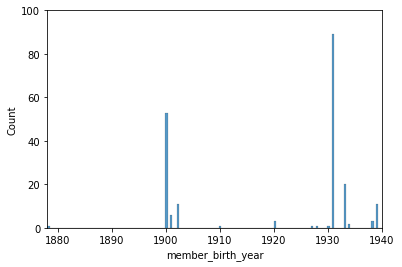

In [15]:
sb.histplot(df.member_birth_year)
plt.xlim(1878, 1940)
plt.ylim(0, 100);

From the histogram above, it can be seen that there are weirdly high number of users with birth year on 1900. Even though it is possible for a human that old to still be able to cycle, there should only be a few of people that are able to do so. Even the oldest cyclist that we have right now so far, i.e. Robert Marchand, is born on 1911. The fact that it's only him that receives the spotlight in the world means that it is highly unlikely that there are other people near his age that still cycles.

Looking at the histogram above, there seems to be a spike at around 1930. This is still logically possible since people born 1930 will be 89 years old by the time this data is collected (i.e. at 2019), and it is still quite possible for people aged 89 to still be able to cycle a bike. There are also some users with birth year a bit earlier than 1930. Thus, from this, I'd set the threshold for the member birth year to be around 1925, so as to give the benefit of the doubt to the users that are born a bit earlier than 1930. For users with birth year earlier than 1925, I will consider them as inaccurate values and will replace their birth year as null. I will not set them to an assumed value so that it does not interfere with analysis result.

##### Cleaning
Replace member_birth_year that are earlier than 1925 to be NaN.

In [16]:
idxs = df.member_birth_year < 1925
old_number_of_nans = df.member_birth_year.isna().sum()
df.member_birth_year.loc[idxs] = np.NaN

# test
assert df.member_birth_year.isna().sum() == old_number_of_nans + idxs.sum()
assert (df.member_birth_year < 1925).sum() == 0

Now we can see in below histogram that there are no more users with birth year earlier than 1925.

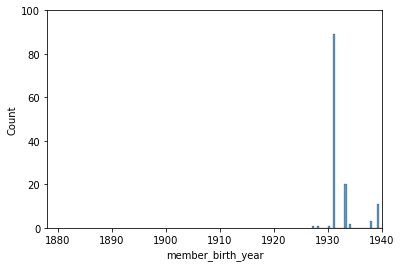

In [17]:
np.sort(df.member_birth_year.dropna().values)
sb.histplot(df.member_birth_year)
plt.xlim(1878, 1940)
plt.ylim(0, 100);

#### Duration Accuracy Assessment
Comparing the duration with the difference between start and end time, and showing the statistics, shows that the duration values are accurate. This is because as can be seen below, the maximum difference between the duration and the actual difference between start and end time is only 999 milliseconds.

In [18]:
((df.end_time - df.start_time) - df.duration).describe()

count                       183412
mean     0 days 00:00:00.499112729
std      0 days 00:00:00.288287556
min                0 days 00:00:00
25%         0 days 00:00:00.249000
50%         0 days 00:00:00.500000
75%         0 days 00:00:00.748000
max         0 days 00:00:00.999000
dtype: object

Conclusion: it is concluded that the duration and the start and end times approximately agree with each other, and hence the duration data is accurate and consistent.

#### Data Quality Assessment Conclusion

All columns are now considered as acceptable and in good quality. The data is also considered as tidy. Below the dataframes preview are presented.

In [19]:
df.head()

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0 days 14:29:45,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
1,0 days 11:48:41,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,False
2,0 days 17:10:54,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,0 days 10:08:10,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,0 days 00:26:25,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration                 183412 non-null  timedelta64[ns]
 1   start_time               183412 non-null  datetime64[ns] 
 2   end_time                 183412 non-null  datetime64[ns] 
 3   start_station_id         183215 non-null  object         
 4   start_station_name       183215 non-null  object         
 5   start_station_latitude   183412 non-null  float64        
 6   start_station_longitude  183412 non-null  float64        
 7   end_station_id           183215 non-null  object         
 8   end_station_name         183215 non-null  object         
 9   end_station_latitude     183412 non-null  float64        
 10  end_station_longitude    183412 non-null  float64        
 11  bike_id                  183412 non-null  object         
 12  us

In [21]:
df.describe()

,duration,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412,183412.000000,183412.000000,183412.000000,183412.000000,175072.000000
mean,0 days 00:12:06.078435434,37.771223,-122.352664,37.771427,-122.352250,1984.842333
std,0 days 00:29:54.389780016,0.099581,0.117097,0.099490,0.116673,9.968551
min,0 days 00:01:01,37.317298,-122.453704,37.317298,-122.453704,1927.000000
25%,0 days 00:05:25,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,0 days 00:08:34,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,0 days 00:13:16,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,0 days 23:44:04,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?
There are 183412 bike usage records in the dataset with 14 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

The columns are mostly numeric with some datetime columns for start and end time and some nominal categorical columns like user_type and member_gender.

There are some null values for the station IDs and names, member birth year, and member gender, but those null values are deemed reasonable and will not be removed.

### What is/are the main feature(s) of interest in your dataset?
Main features of interest in the dataset are:
- statistics of bike usage demand based on time, location, and user demography
- the most favored destination of users
- any "users' favorite" bike, to look at any possible "special" bike that is taken at the highest rate by the users, which might indicate that the bike has higher quality than others and can be used as reference when the company needs to order new bikes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
All columns are apparently helpful to investigate the features of interest described above:
- duration can be used as metric for the bike usage demand
- user type, member birth year, and member gender can be used for user demography
- start time and station can be used for finding bike demand based on time and location
- end station can be used to find most favored destination of users
- end time can be used to see at what time most bikes are available
- bike ID can be used to find if there is any "users' favorite" bike

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Bike ID
Below we'll print the number of unique bike IDs, which shows the estimated total number of bikes available in the area (because there might be some bikes that are never used at all, hence not recorded in the dataset).

In [326]:
df.bike_id.nunique()

4646

This means there are 4646 bikes in total within the area.

Below is the plot of sorted value counts of the bike IDs.

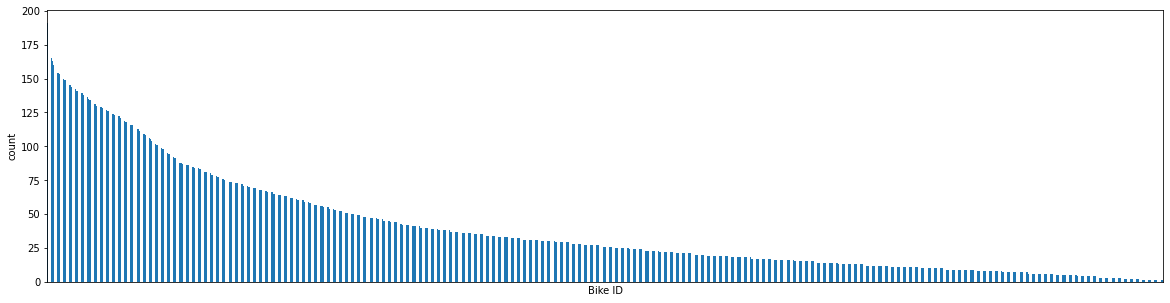

In [173]:
df.bike_id.value_counts().plot(kind='bar', xticks=[], xlabel='Bike ID', ylabel='count', figsize=(20,5));

The plot shows that thereare bikes that are used more times than the others. This might be due to higher quality of bike, or due to the more strategic locations of the bikes. The top 5 most favorie bike IDs are printed below.

In [336]:
print(f'Top 5 most favorite bike IDs: {df.bike_id.value_counts().index[:5].values}')

Top 5 most favorite bike IDs: ['4794' '4814' '5014' '4422' '5145']


### Duration
Below diagram shows sectioned histogram, to be able to see the histograms clearly on the lower count values at higher duration values.

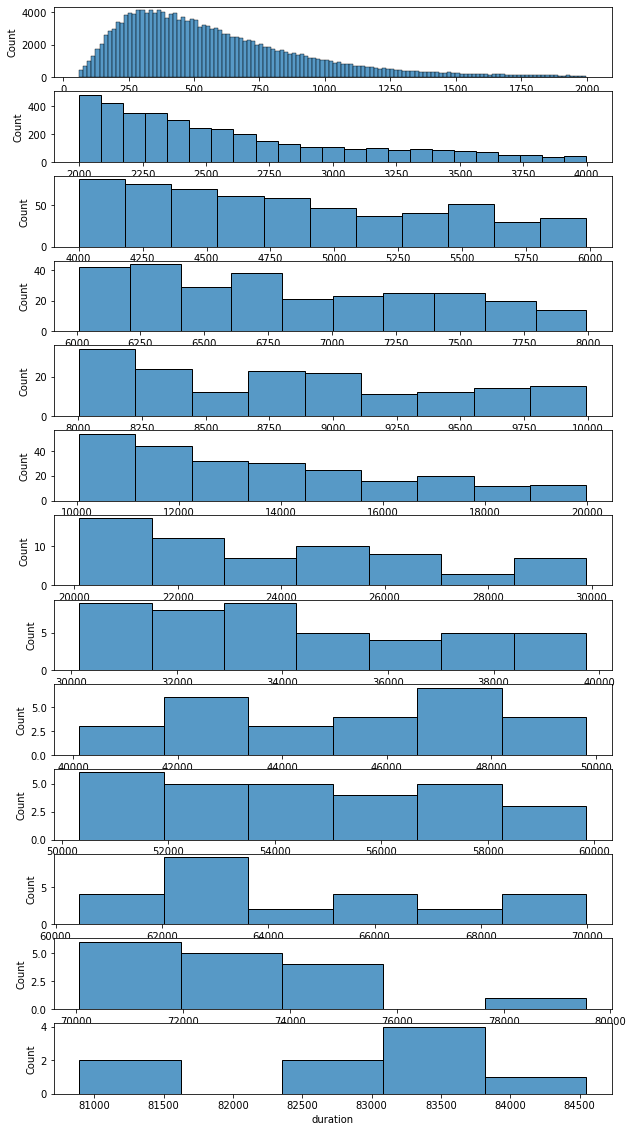

In [22]:
start_duration = -0.001
end_durations = [2000, 4000, 6000, 8000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 85000]
duration_seconds = df.duration.dt.total_seconds()
plt.figure(figsize=(10,20))
plt.tight_layout()
for i, end_duration in enumerate(end_durations, start=1):
    plt.subplot(len(end_durations), 1, i)
    idxs = (duration_seconds > start_duration) & (duration_seconds <= end_duration)
    sb.histplot(duration_seconds[idxs])
    start_duration = end_duration

The distribution seems to be right-skewed, and seems to follow Poisson distribution. Also, the distribution is smooth, i.e. no big gaps with zero counts in the distribution, showing that there are no outliers. The maximum value of distribution also still makes sense, i.e. ~84500 seconds, which is equal to roughly 24 hours.

Below then I will plot using log scale.

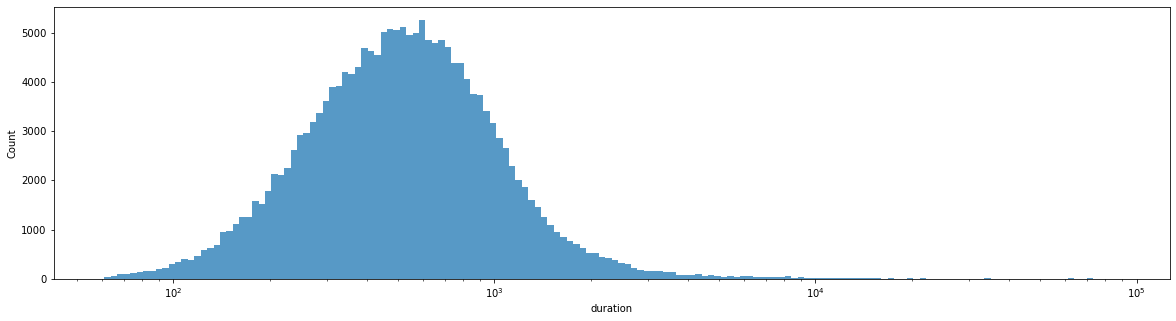

In [254]:
duration_secs = df.duration.dt.total_seconds()
bins_log_size = 0.02
powers = np.arange(np.log10(duration_secs.min()), np.log10(duration_secs.max()) + bins_log_size, bins_log_size)
bins = 10 ** powers

plt.figure(figsize=(20,5))
sb.histplot(duration_secs, bins=bins)
plt.xscale('log')

Distribution shows that the duration is normally distributed on log scale, with slightly left skewed distribution.

### User Type

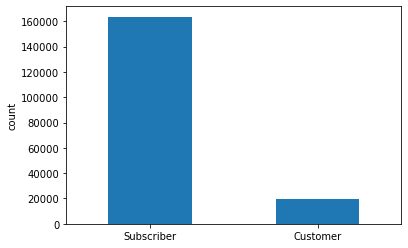

In [23]:
df.user_type.value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.ylabel('count');

It is shown that there are much more subscribers than customers.

### Member Birth Year

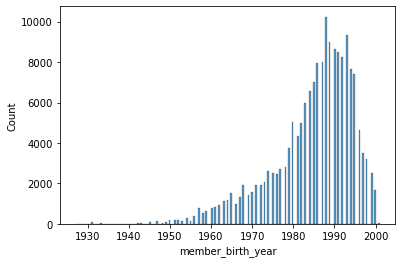

In [24]:
sb.histplot(df.member_birth_year);

Distribution of member birth year seems to be left-skewed. This shows that there is a range of "prime age" where most bikers are at, and that any age older or younger than that prime age range are observed less, with older age observed more than younger age.

Below we'll convert the member birth year to age.

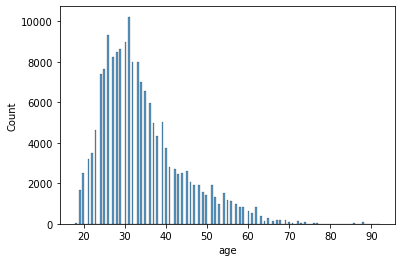

In [256]:
df['age'] = 2019 - df.member_birth_year
sb.histplot(df.age);

The member ages instead are right skewed, showing indeed the hypothesis we had above. Below then I'll show the age distribution in log scale.

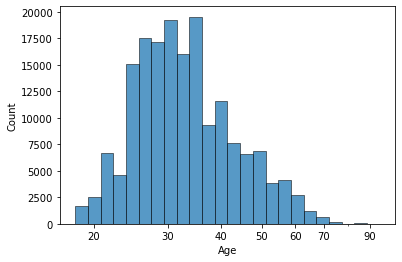

In [257]:
bins_size_log = 0.03
bins = 10 ** np.arange(np.log10(df.age.min() + 0.1), np.log10(df.age.max()) + bins_size_log, bins_size_log)
sb.histplot(df.age, bins=bins)
plt.xscale('log')
plt.xlabel('Age');
ticks = [20, 30, 40, 50, 60, 70, 90]
plt.xticks(ticks, ticks);

The log scale distribution is almost having normal distribution, with still a little right skewedness.

Nonetheless, we can see from both the linear and log scale histogram that in general highest bike demands are from the age group of around 30 years old.

### Member Gender

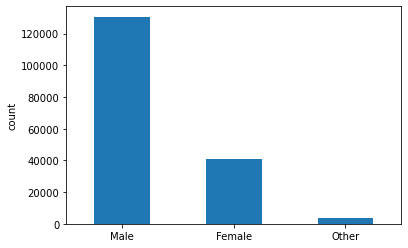

In [25]:
df.member_gender.value_counts().plot(kind='bar', rot=0);
plt.ylabel('count');

The data shows that there is higher percentage of male than female users, with "other" gender being the lowest.

### Station ID and Name
Below we'll plot the sorted value counts of the start and end station ID and name.

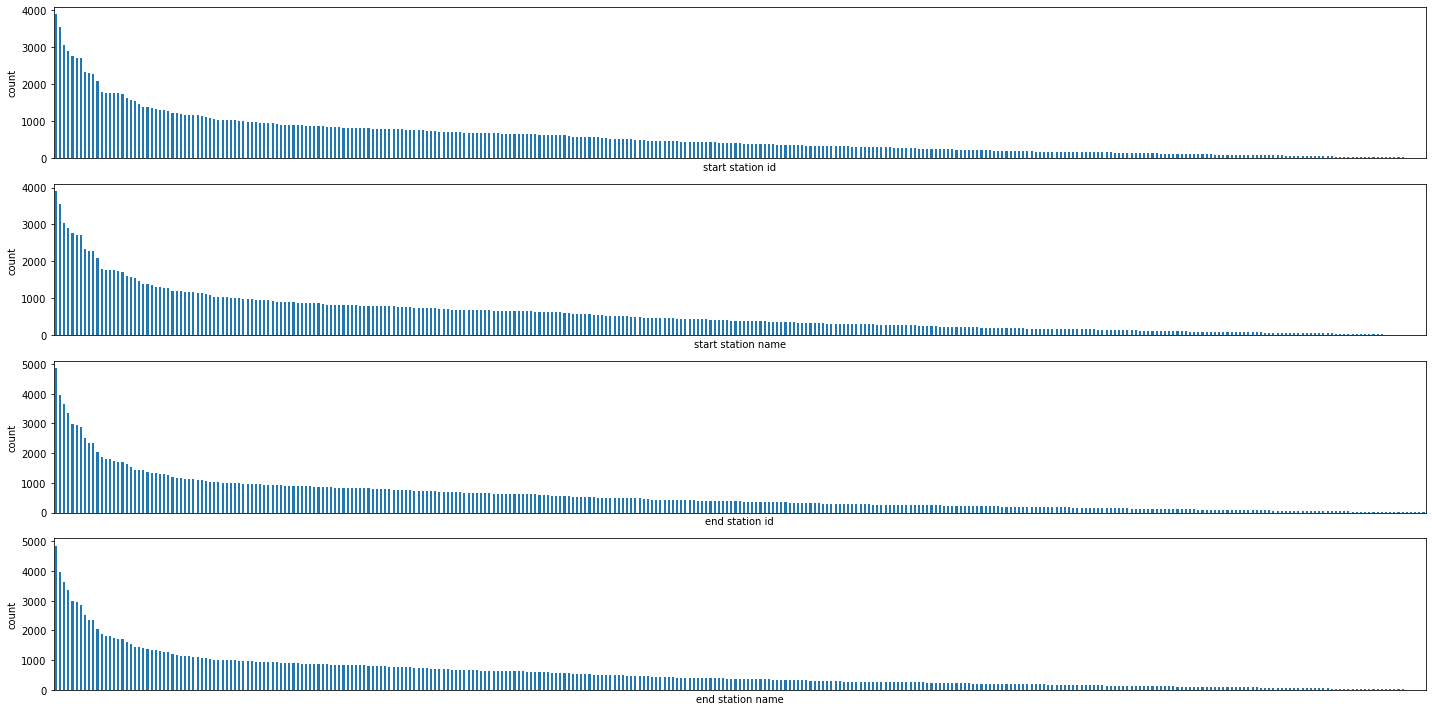

In [91]:
plt.figure(figsize=(20,10))
plt.subplot(4, 1, 1)
df.start_station_id.value_counts().plot(kind='bar', xticks=[], xlabel='start station id', ylabel='count');
plt.subplot(4, 1, 2)
df.start_station_name.value_counts().plot(kind='bar', xticks=[], xlabel='start station name', ylabel='count');
plt.subplot(4, 1, 3)
df.end_station_id.value_counts().plot(kind='bar', xticks=[], xlabel='end station id', ylabel='count');
plt.subplot(4, 1, 4)
df.end_station_name.value_counts().plot(kind='bar', xticks=[], xlabel='end station name', ylabel='count');
plt.tight_layout();

As can be seen above, the distribution is smoothly decreasing. This shows that some stations are more popular than the others. There is also no big gaps in the distributions, showing there is no outlier.

### Station Latitude and Longitude

Value counts plot of latitude and longitude of start and end station.

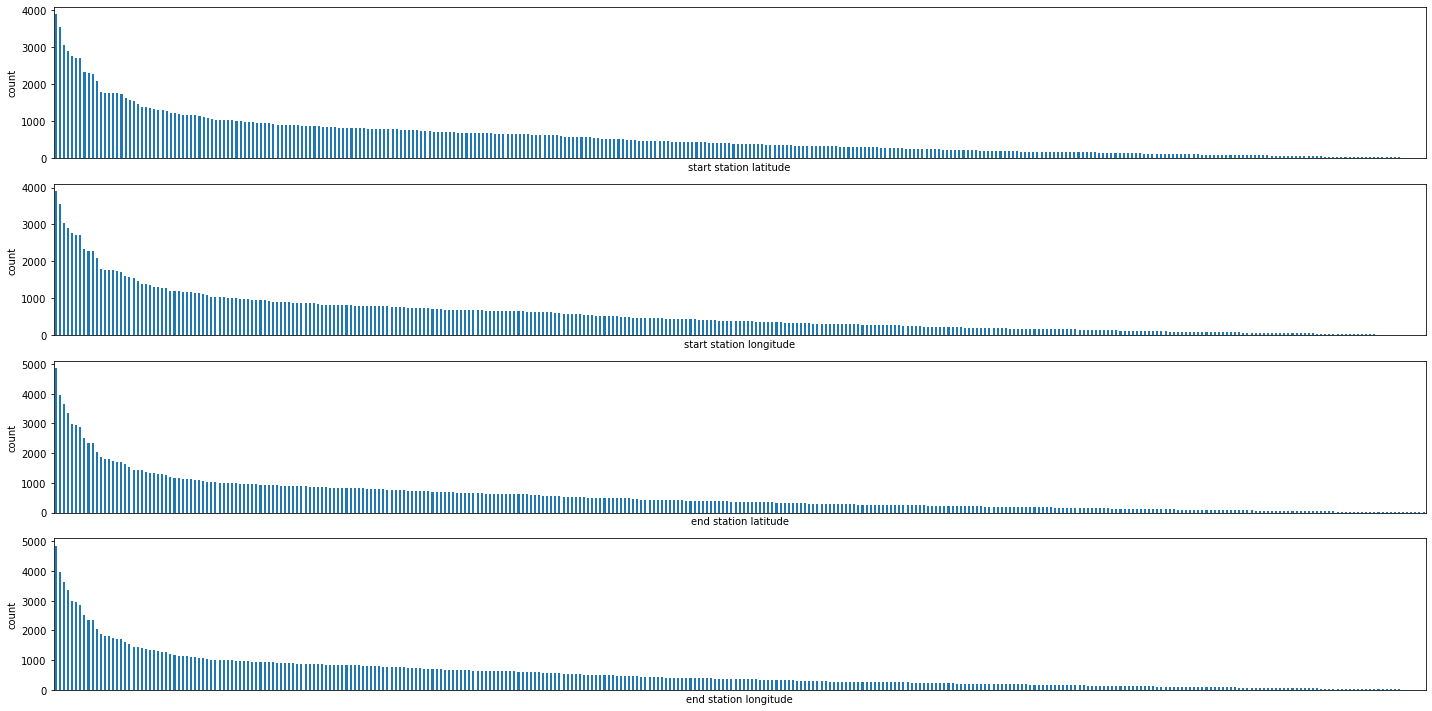

In [100]:
plt.figure(figsize=(20,10))
plt.subplot(4, 1, 1)
df.start_station_latitude.value_counts().plot(kind='bar', xticks=[], xlabel='start station latitude', ylabel='count');
plt.subplot(4, 1, 2)
df.start_station_longitude.value_counts().plot(kind='bar', xticks=[], xlabel='start station longitude', ylabel='count');
plt.subplot(4, 1, 3)
df.end_station_latitude.value_counts().plot(kind='bar', xticks=[], xlabel='end station latitude', ylabel='count');
plt.subplot(4, 1, 4)
df.end_station_longitude.value_counts().plot(kind='bar', xticks=[], xlabel='end station longitude', ylabel='count');
plt.tight_layout();

Histogram plot is shown below.

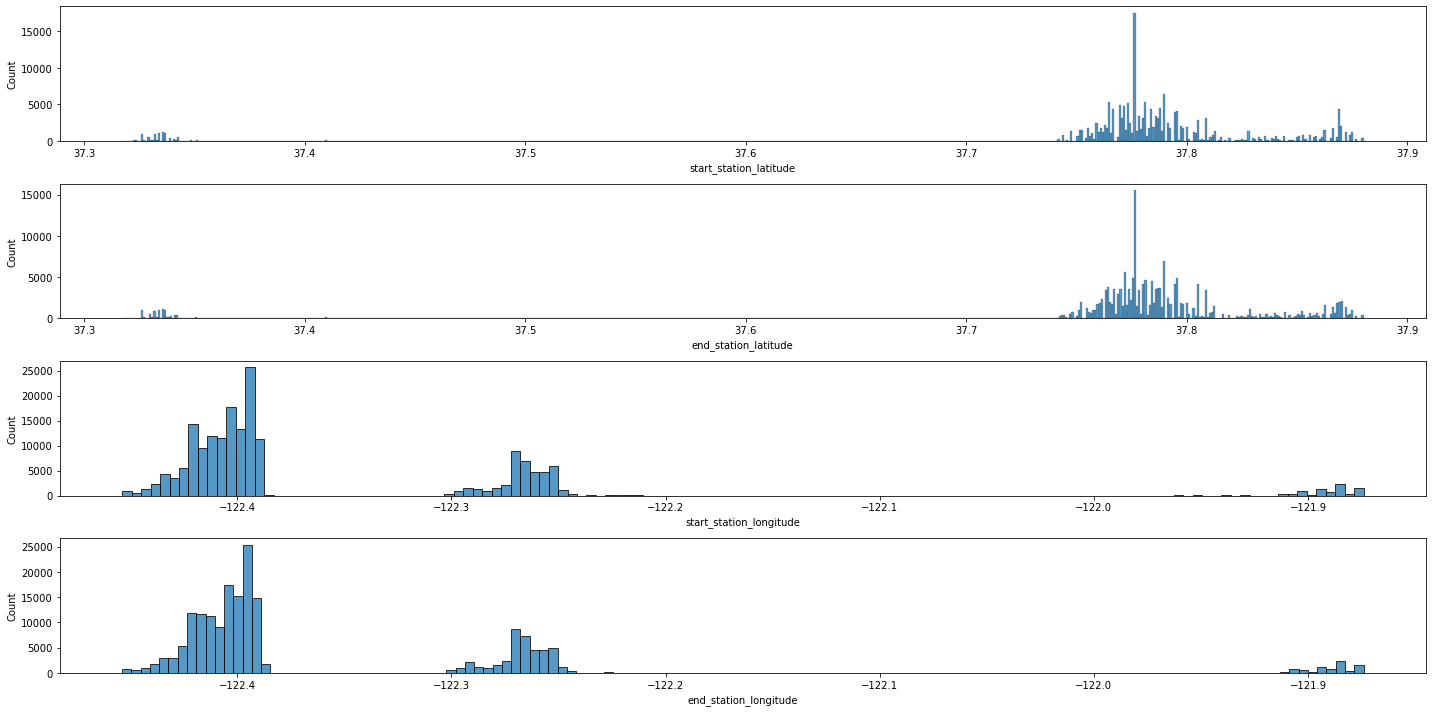

In [259]:
plt.figure(figsize=(20,10))
plt.subplot(4, 1, 1)
sb.histplot(df.start_station_latitude)
plt.subplot(4, 1, 2)
sb.histplot(df.end_station_latitude)
plt.subplot(4, 1, 3)
sb.histplot(df.start_station_longitude)
plt.subplot(4, 1, 4)
sb.histplot(df.end_station_longitude)
plt.tight_layout();

There is a weird spike for the latitude of both start and end station. Let's zoom in on the spike to be around 37.77 to 37.78.

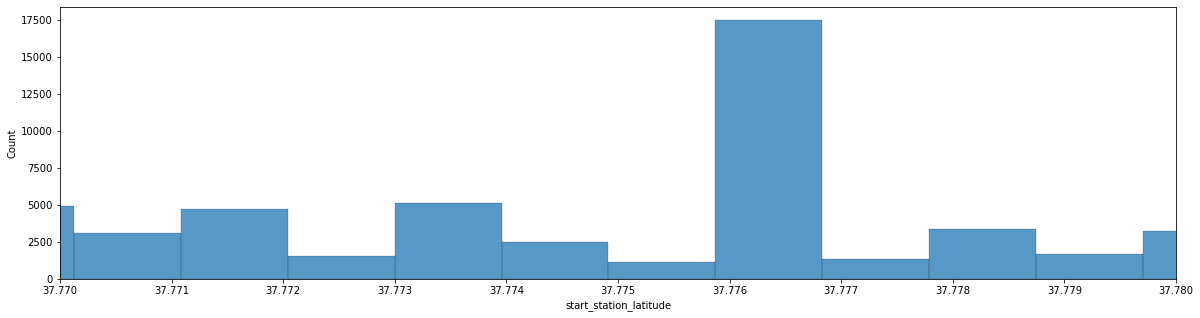

In [122]:
plt.figure(figsize=(20,5))
sb.histplot(df.start_station_latitude);
plt.xticks(ticks=np.arange(37.77, 37.79, 0.001));
plt.xlim((37.77, 37.78));
plt.ticklabel_format(useOffset=False);

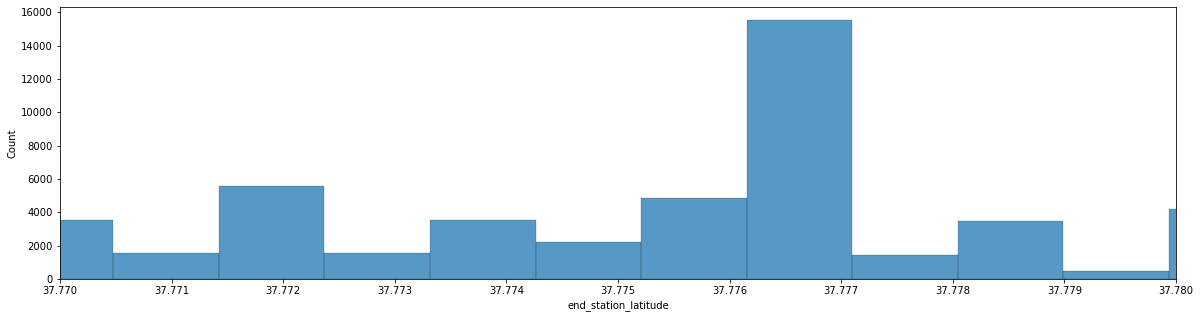

In [123]:
plt.figure(figsize=(20,5))
sb.histplot(df.end_station_latitude);
plt.xticks(ticks=np.arange(37.77, 37.79, 0.001));
plt.xlim((37.77, 37.78));
plt.ticklabel_format(useOffset=False);

From the above plot, we can see that the spike occurs between latitude of 37.776 and 37.777 for both start and end station. Now let's plot the histogram focusing only on this range.

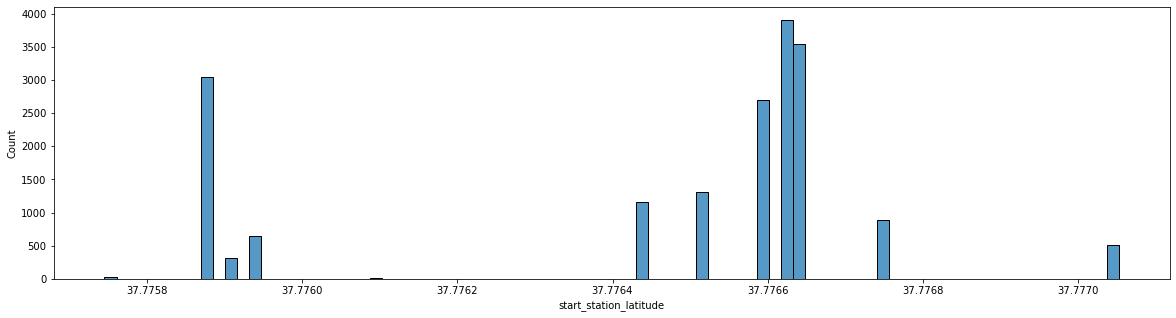

In [174]:
idx = (df.start_station_latitude >= 37.7757) & (df.start_station_latitude <= 37.7773)
plt.figure(figsize=(20,5))
sb.histplot(df.start_station_latitude[idx]);
plt.ticklabel_format(useOffset=False);

Below we'll print the rows that corresponds to start station latitude between 37.7766 and 37.7762 (these values are obtained after zooming in further on the histogram above).

In [136]:
idx = (df.start_station_latitude >= 37.77660) & (df.start_station_latitude <= 37.77662)
df[idx]

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
38,0 days 00:17:46,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58,Market St at 10th St,37.776619,-122.417385,145,29th St at Church St,37.743684,-122.426806,5938,Subscriber,1992,Female,False
54,0 days 00:06:41,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58,Market St at 10th St,37.776619,-122.417385,62,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990,Female,False
110,0 days 00:06:11,2019-02-28 23:01:15.077,2019-02-28 23:07:26.459,58,Market St at 10th St,37.776619,-122.417385,98,Valencia St at 16th St,37.765052,-122.421866,6435,Subscriber,1994,Male,False
114,0 days 00:06:16,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,58,Market St at 10th St,37.776619,-122.417385,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,Subscriber,1982,Male,False
190,0 days 00:08:35,2019-02-28 22:28:11.347,2019-02-28 22:36:46.389,58,Market St at 10th St,37.776619,-122.417385,321,5th St at Folsom,37.780146,-122.403071,5234,Subscriber,1981,Other,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183362,0 days 00:14:59,2019-02-01 01:08:39.015,2019-02-01 01:23:38.798,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,2033,Subscriber,1999,Male,False
183364,0 days 00:14:52,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,3392,Subscriber,2000,Male,False
183365,0 days 00:15:32,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,4962,Subscriber,2000,Female,False
183366,0 days 00:15:32,2019-02-01 01:07:49.971,2019-02-01 01:23:22.528,58,Market St at 10th St,37.776619,-122.417385,133,Valencia St at 22nd St,37.755213,-122.420975,5382,Subscriber,2000,Female,False


The start station name is "Market St at 10th St". This is then expected since it's a market area, where high bike demand is very likely. The spike in the histogram is then not an issue.

Below we'll reproduce the histogram of latitude and longitude (only for start station, because the end station distribution is roughly similar with start station).

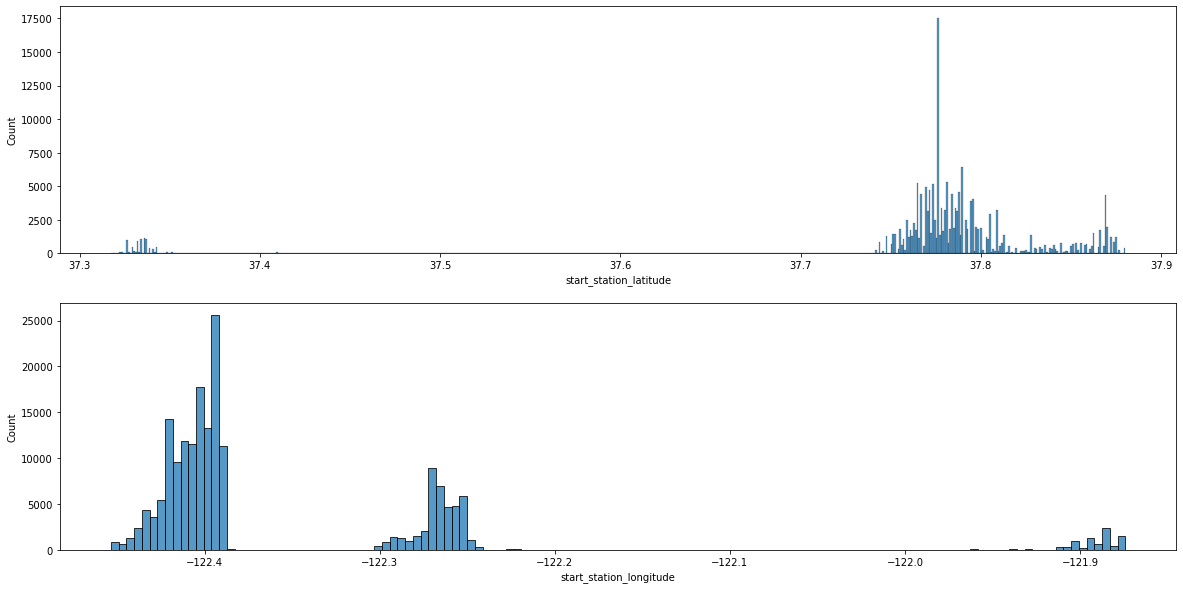

In [176]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
sb.histplot(df.start_station_latitude)
plt.subplot(2, 1, 2)
sb.histplot(df.start_station_longitude);

The distribution shows that there are several clusters of location where the bike demands are high. From this we can later on plot the regions of high demands.

### Start Time and End Time
Below we'll plot the distribution of the date of the start and end time.

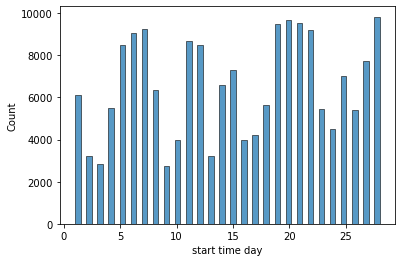

In [162]:
sb.histplot(df.start_time.dt.day)
plt.xlabel('start time day');

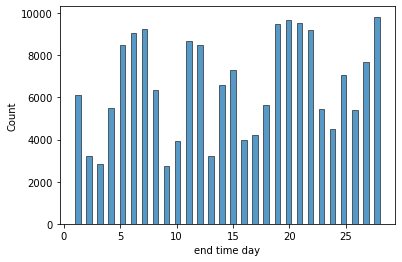

In [163]:
sb.histplot(df.end_time.dt.day)
plt.xlabel('end time day');

The plot above shows there is some sort of weekly trend of the bike demands.

Below we'll plot the histogram of the day of week of the start and end times.

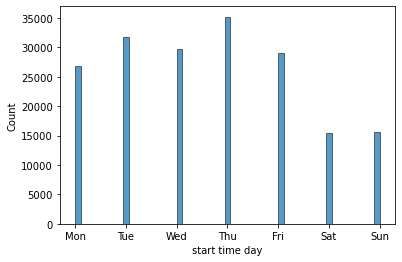

In [293]:
sb.histplot(df.start_time.dt.dayofweek)
plt.xlabel('start time day');
plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat', 'Sun']);

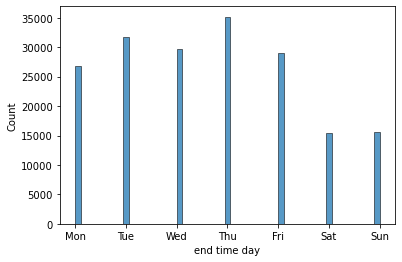

In [294]:
sb.histplot(df.end_time.dt.dayofweek)
plt.xlabel('end time day');
plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat', 'Sun']);

From the plot above, we can see that demands are lower on the weekends and higher on the weekdays.

Below we'll plot the histogram of the hour of the start and end time.

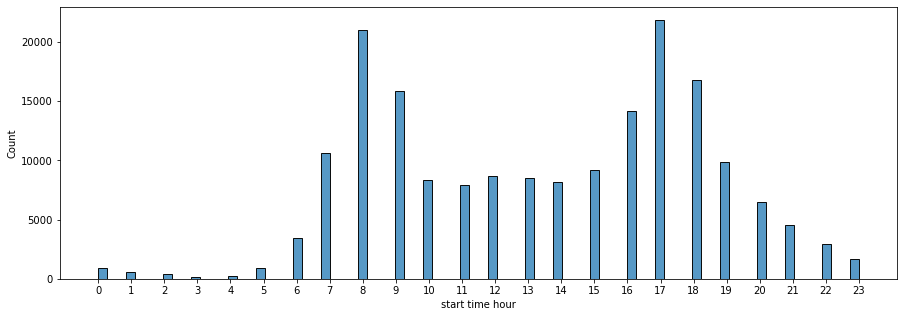

In [272]:
plt.figure(figsize=(15,5))
sb.histplot(df.start_time.dt.hour)
plt.xlabel('start time hour');
ticks = np.arange(0, 24, 1)
plt.xticks(ticks);

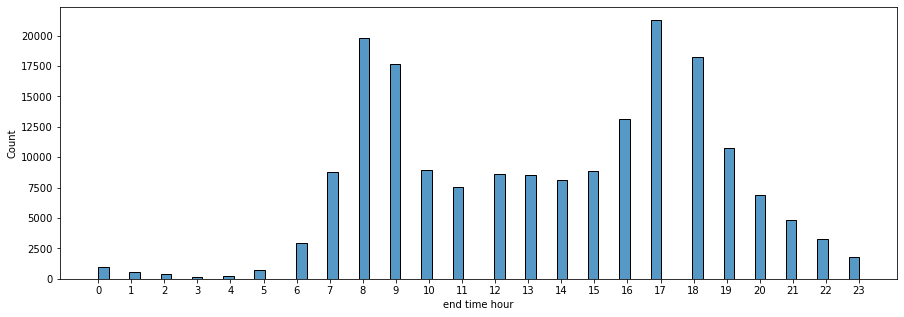

In [273]:
plt.figure(figsize=(15,5))
sb.histplot(df.end_time.dt.hour)
plt.xlabel('end time hour');
ticks = np.arange(0, 24, 1)
plt.xticks(ticks);

The distributions above shows that there are 2 peak hours during the day, which is around 08:00 and 17:00. The similar distribution of the start and end hour shows that most of the bike usage are for short duration.

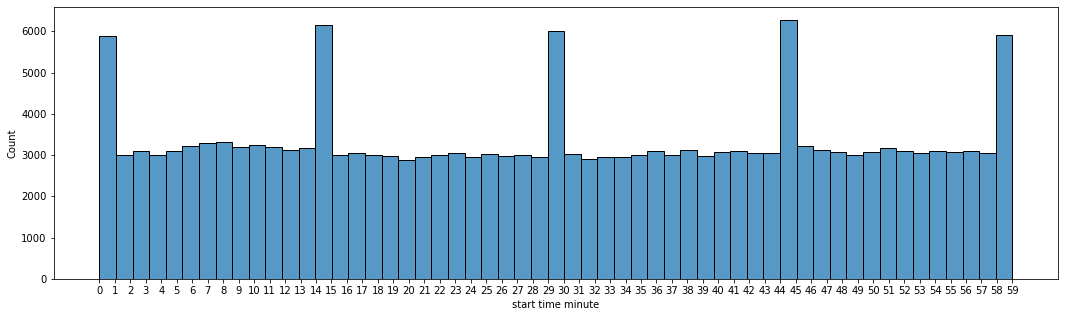

In [277]:
plt.figure(figsize=(18,5))
sb.histplot(df.start_time.dt.minute)
plt.xlabel('start time minute');
ticks = np.arange(0, 60, 1)
plt.xticks(ticks);

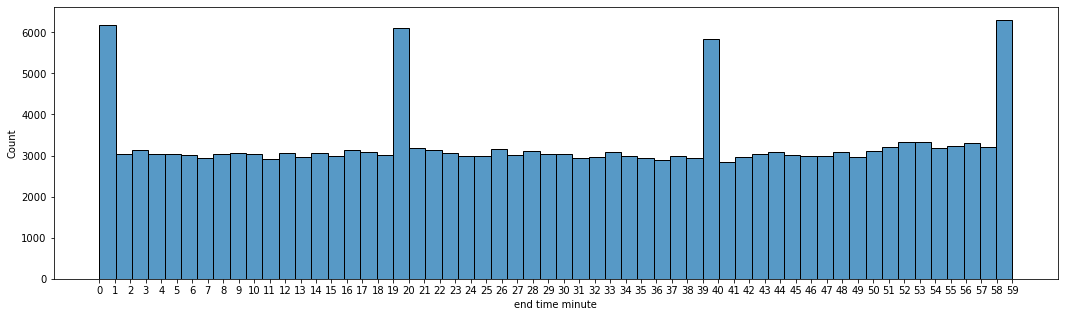

In [278]:
plt.figure(figsize=(18,5))
sb.histplot(df.end_time.dt.minute)
plt.xlabel('end time minute');
ticks = np.arange(0, 60, 1)
plt.xticks(ticks);

From the plots above, interestingly, there are some weird apparent spikes located at different locations for the minute of start and end time. For the start time, the peaks are located at minute of 1, 15, 30, 45, and 59 (taking the right edge of the bins). For the end time, the peaks are located at minute of 1, 20, 40, and 59 (taking the right edge of the bins).

This raised the question, is it just that most people's booking often start and end at these exact minutes? Or is there some sort of periodic and "on schedule" activities that require such exact timing of the bike rent?

In [420]:
minutes = df.start_time.dt.minute
top_start_stations_general = np.array([])

Number of bikes involved in bookings at minute 0 and 1:
2622 out of 4646 total bikes available,
which accounts for 56.44% of total bikes.

Top 15 start stations:
['2nd St at Townsend St' 'Bancroft Way at College Ave'
 'Bancroft Way at Telegraph Ave' 'Berry St at 4th St'
 'Embarcadero BART Station (Beale St at Market St)'
 'Howard St at Beale St' 'Market St at 10th St'
 'Montgomery St BART Station (Market St at 2nd St)'
 'Powell St BART Station (Market St at 4th St)'
 'Powell St BART Station (Market St at 5th St)'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Steuart St at Market St' 'The Embarcadero at Sansome St']


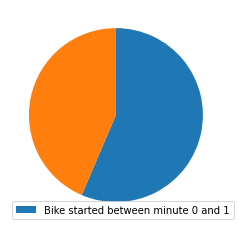

In [421]:
right_edge = 1
idx = (minutes >= right_edge-1) & (minutes <= right_edge)
sub_df = df[idx]

count = sub_df.bike_id.nunique()
total = df.bike_id.nunique()
print(f'Number of bikes involved in bookings at minute {right_edge-1} and {right_edge}:'
      + f'\n{count} out of {total} total bikes available,'
      + f'\nwhich accounts for {count/total*100:.2f}% of total bikes.')

print('\nTop 15 start stations:')
top_start_stations = np.sort(sub_df.start_station_name.value_counts().head(15).index.values)
top_start_stations_general = np.union1d(top_start_stations, top_start_stations_general)
print(top_start_stations)

plt.pie([count, total-count], startangle=90, counterclock=False);
plt.legend([f'Bike started between minute {right_edge-1} and {right_edge}']);

Number of bikes involved in bookings at minute 14 and 15:
2655 out of 4646 total bikes available,
which accounts for 57.15% of total bikes.

Top 15 start stations:
['3rd St at Townsend St' 'Bancroft Way at College Ave'
 'Bancroft Way at Telegraph Ave' 'Beale St at Harrison St'
 'Berry St at 4th St' 'Howard St at Beale St' 'Market St at 10th St'
 'Montgomery St BART Station (Market St at 2nd St)'
 'Powell St BART Station (Market St at 4th St)'
 'Powell St BART Station (Market St at 5th St)'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Steuart St at Market St' 'The Embarcadero at Sansome St']


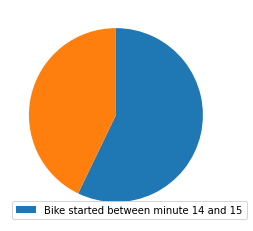

In [422]:
right_edge = 15
idx = (minutes >= right_edge-1) & (minutes <= right_edge)
sub_df = df[idx]

count = sub_df.bike_id.nunique()
total = df.bike_id.nunique()
print(f'Number of bikes involved in bookings at minute {right_edge-1} and {right_edge}:'
      + f'\n{count} out of {total} total bikes available,'
      + f'\nwhich accounts for {count/total*100:.2f}% of total bikes.')

print('\nTop 15 start stations:')
top_start_stations = np.sort(sub_df.start_station_name.value_counts().head(15).index.values)
top_start_stations_general = np.union1d(top_start_stations, top_start_stations_general)
print(top_start_stations)

plt.pie([count, total-count], startangle=90, counterclock=False);
plt.legend([f'Bike started between minute {right_edge-1} and {right_edge}']);

Number of bikes involved in bookings at minute 29 and 30:
2645 out of 4646 total bikes available,
which accounts for 56.93% of total bikes.

Top 15 start stations:
['Bancroft Way at Telegraph Ave' 'Beale St at Harrison St'
 'Berry St at 4th St' 'Howard St at 8th St' 'Howard St at Beale St'
 'Market St at 10th St' 'Montgomery St BART Station (Market St at 2nd St)'
 'Powell St BART Station (Market St at 4th St)'
 'Powell St BART Station (Market St at 5th St)'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Steuart St at Market St' 'The Embarcadero at Sansome St'
 'Townsend St at 7th St']


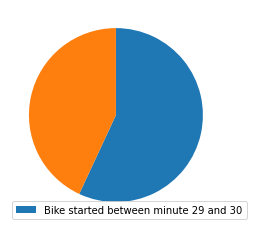

In [423]:
right_edge = 30
idx = (minutes >= right_edge-1) & (minutes <= right_edge)
sub_df = df[idx]

count = sub_df.bike_id.nunique()
total = df.bike_id.nunique()
print(f'Number of bikes involved in bookings at minute {right_edge-1} and {right_edge}:'
      + f'\n{count} out of {total} total bikes available,'
      + f'\nwhich accounts for {count/total*100:.2f}% of total bikes.')

print('\nTop 15 start stations:')
top_start_stations = np.sort(sub_df.start_station_name.value_counts().head(15).index.values)
top_start_stations_general = np.union1d(top_start_stations, top_start_stations_general)
print(top_start_stations)

plt.pie([count, total-count], startangle=90, counterclock=False);
plt.legend([f'Bike started between minute {right_edge-1} and {right_edge}']);

Number of bikes involved in bookings at minute 44 and 45:
2669 out of 4646 total bikes available,
which accounts for 57.45% of total bikes.

Top 15 start stations:
['4th St at 16th St' '4th St at Mission Bay Blvd S' 'Berry St at 4th St'
 'Howard St at 8th St' 'Howard St at Beale St' 'Market St at 10th St'
 'Montgomery St BART Station (Market St at 2nd St)'
 'Powell St BART Station (Market St at 4th St)'
 'Powell St BART Station (Market St at 5th St)'
 'San Francisco Caltrain (Townsend St at 4th St)'
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Steuart St at Market St' 'The Embarcadero at Sansome St'
 'Townsend St at 7th St']


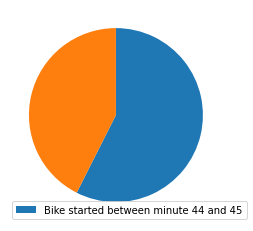

In [424]:
right_edge = 45
idx = (minutes >= right_edge-1) & (minutes <= right_edge)
sub_df = df[idx]

count = sub_df.bike_id.nunique()
total = df.bike_id.nunique()
print(f'Number of bikes involved in bookings at minute {right_edge-1} and {right_edge}:'
      + f'\n{count} out of {total} total bikes available,'
      + f'\nwhich accounts for {count/total*100:.2f}% of total bikes.')

print('\nTop 15 start stations:')
top_start_stations = np.sort(sub_df.start_station_name.value_counts().head(15).index.values)
top_start_stations_general = np.union1d(top_start_stations, top_start_stations_general)
print(top_start_stations)

plt.pie([count, total-count], startangle=90, counterclock=False);
plt.legend([f'Bike started between minute {right_edge-1} and {right_edge}']);

In [427]:
top_start_stations_general

array(['2nd St at Townsend St', '3rd St at Townsend St',
       '4th St at 16th St', '4th St at Mission Bay Blvd S',
       'Bancroft Way at College Ave', 'Bancroft Way at Telegraph Ave',
       'Beale St at Harrison St', 'Berry St at 4th St',
       'Embarcadero BART Station (Beale St at Market St)',
       'Howard St at 8th St', 'Howard St at Beale St',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'Powell St BART Station (Market St at 5th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Steuart St at Market St', 'The Embarcadero at Sansome St',
       'Townsend St at 7th St'], dtype=object)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

For the duration variable, the distribution was highly right skewed. I had to do log scale transformation to the variable. It was then observed that the duration has log-normal distribution, with still a little amount of right skewedness.

The member birth year was highly left skewed. First I converted the member birth year to be age variable by subtracting 2019 from each birth year. This age variable is then observed to be right skewed. Even after doing log scale transformation to the age variable, the distribution still have significant right skewedness.

For the station latitude, there is a high spike at around latitude of 37.776, which basically is because that location is a market area, thus having high bike demand is expected.

Distribution of the "date" of the start and end time shows that there is weekly trends on the bike demand. Aside from that, distribution of the "hour" of the start and end time shows that there is high peak hours at around 08:00 and 17:00.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

I converted the member birth year column to be age, as age is more helpful for analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!